# ST445 Managing and Visualizing Data
## Matrix Data Visualization
### Milan Vojnovic and Christine Yuen, MT 2017

# Seriation

This notebook demonstrates symmetric reordering of rows and columns of a matrix by using the *seriation method* to the adjacency matrix of a random graph according to the [stochastic block model](https://en.wikipedia.org/wiki/Stochastic_block_model). 

We consider a stochastic block model where vertices are partitioned in two equally-sized subsets of vertices with parameters $p$ and $q$, where $p$ is the probability that two vertices are connected by an edge if they belong to the same subset of the bipartition, and $q$ is the probability that two vertices are connected by an edge if they belong to different subsets of the bipartition.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

## Generating adjacency matrix according to stochastic block model 

In [2]:
p = 1; q = 0 # no noise case
#p = 0.99; q = 0.11 # tiny noise case
#p = 0.9; q = 0.1 # small noise case

# number of nodes in each component of the bipartition
n = 50

B1 = np.random.binomial(1, p, [n, n])
B2 = np.random.binomial(1, p, [n, n])
C  = np.random.binomial(1, q, [n, n])

A = np.bmat('B1, C; C, B2') # constructing a block matrix

# making the matrix symmetric
A = np.tril(A,-1)
A = A + A.T

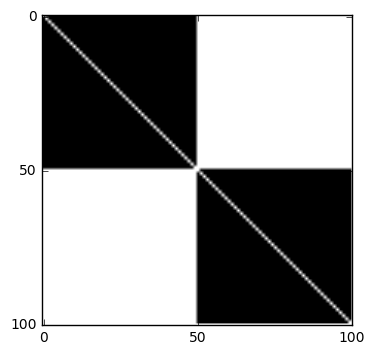

In [3]:
fig, ax = plt.subplots()

ax.imshow(A, cmap=plt.cm.gray_r) # reversed gray colormap

ax.set_xticks([0, n, 2*n]);
ax.set_yticks([0, n, 2*n]);

Note: See here about [imshow()](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html). You may also use [matshow()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.matshow.html). See [here](https://matplotlib.org/examples/color/colormaps_reference.html) and [here](https://matplotlib.org/users/colormaps.html) for references about choosing a colormap. 

## Reordering rows and columns according to random permutation

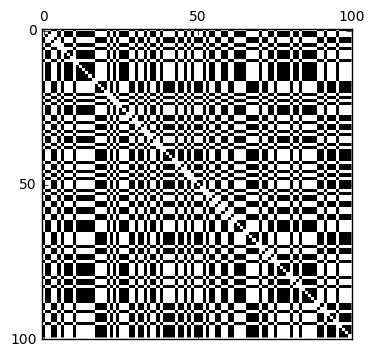

In [4]:
rndperm = np.random.permutation(2*n)

Aperm = A[rndperm,:] # permute rows
Aperm = Aperm[:,rndperm] # permute columns

fig, ax = plt.subplots()

ax.matshow(Aperm, cmap=plt.cm.gray_r)

ax.set_xticks([0, n, 2*n]);
ax.set_yticks([0, n, 2*n]);

Note: Numpy's [np.random.permutation()](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.permutation.html) function came handy here.

## Reordering rows and columns in order of the Fiedler vector elements

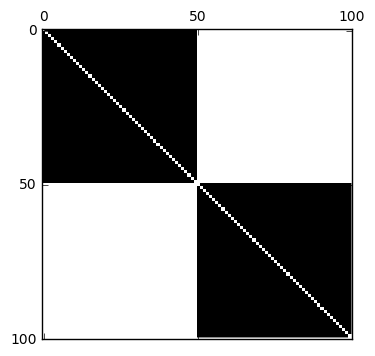

In [5]:
# compute the Laplacian matrix
L = np.diag(sum(Aperm,1)) - Aperm

# compute eigenvalues and eigenvectors of the Laplacian matrix
D, V = np.linalg.eigh(L)

argD = np.argsort(D)

D=D[argD]
V=V[:,argD]

# get the Fiedler eigenvector
fiedler = V[:,1]

# permutation in the order of Fiedler vector elements
Fperm = np.argsort(fiedler)

# permute rows
Aperm2 = Aperm[Fperm,:]
# permute columns
Aperm2 = Aperm2[:,Fperm]

# show the transformed matrix
fig, ax = plt.subplots()

ax.matshow(Aperm2, cmap=plt.cm.gray_r)

ax.set_xticks([0, n, 2*n]);
ax.set_yticks([0, n, 2*n]);